In [1]:
# Ячейка 1: Импорт и настройка

import importlib
import sys

# Перезагружаем весь основной модуль
import bank_system
importlib.reload(bank_system)

from bank_system import (
    Account,
    CheckingAccount,
    SavingsAccount,
    AccountVisualizer,
    TransactionAnalyzer
)

from IPython.display import display, HTML
import pandas as pd

# Настройка отображения pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("✅ Все классы импортированы успешно!")

✅ Все классы импортированы успешно!


In [2]:
# Ячейка 2: Создание счетов и базовые операции
print("Система управления банковскими счетами")
print("=" * 50)

print("Создание банковских счетов")
print("-" * 30)

# Создаем счета
checking = CheckingAccount("Иван Иванов", 1000)
savings = SavingsAccount("Мария Петрова", 5000)

print(f"✅ Создан расчетный счет: {checking.holder}")
print(f"   Номер счета: {checking.account_number}")
print(f"   Начальный баланс: {checking.get_balance():.2f} ₽")

print(f"✅ Создан сберегательный счет: {savings.holder}")
print(f"   Номер счета: {savings.account_number}")
print(f"   Начальный баланс: {savings.get_balance():.2f} ₽")

Система управления банковскими счетами
Создание банковских счетов
------------------------------
✅ Создан расчетный счет: Иван Иванов
   Номер счета: ACC-1000
   Начальный баланс: 1000.00 ₽
✅ Создан сберегательный счет: Мария Петрова
   Номер счета: ACC-1001
   Начальный баланс: 5000.00 ₽


In [3]:
# Ячейка 3: Выполнение операций
print("\n Выполнение операций")
print("-" * 25)

# Операции по счетам
checking.deposit(1500)
checking.withdraw(300)
savings.deposit(2000)
savings.apply_interest(5)  # 5% годовых
savings.withdraw(1000)

print("✅ Операции выполнены успешно!")
print(f"Расчетный счет: {checking.get_balance():.2f} ₽")
print(f"Сберегательный счет: {savings.get_balance():.2f} ₽")


 Выполнение операций
-------------------------
✅ Операции выполнены успешно!
Расчетный счет: 2200.00 ₽
Сберегательный счет: 6350.00 ₽


In [4]:
# Ячейка 4: Тестирование функциональности
print("\n🧪 Тестирование функциональности")
print("-" * 28)

print("1. Проверка валидации имени:")
try:
    invalid_account = Account("иван иванов")  # строчные буквы
except ValueError as e:
    print(f"   ✅ Ожидаемая ошибка: {e}")

print("\n2. Проверка отрицательного баланса:")
try:
    checking.balance = -100  # отрицательный баланс
except ValueError as e:
    print(f"   ✅ Ожидаемая ошибка: {e}")

print("\n3. Проверка лимита снятия со сберегательного счета:")
try:
    savings.withdraw(4000)  # больше 50% от баланса
except ValueError as e:
    print(f"   ✅ Ожидаемая ошибка: {e}")

# print("\n4. Создание счета с кастомным номером:")
# custom_acc = CheckingAccount("Тест Пользователь", account_number="ACC-99999")
# print(f"   ✅ Счет создан: {custom_acc.account_number}")


🧪 Тестирование функциональности
----------------------------
1. Проверка валидации имени:
   ✅ Ожидаемая ошибка: Имя владельца должно быть в формате 'Имя Фамилия' с заглавных букв, кириллицей или латиницей

2. Проверка отрицательного баланса:
   ✅ Ожидаемая ошибка: Баланс не может быть отрицательным

3. Проверка лимита снятия со сберегательного счета:
   ✅ Ожидаемая ошибка: Нельзя снять более 50% от баланса. Максимально доступно: 3175.00


In [5]:
# Ячейка 5: Тестирование операций и истории
print("\n Тестирование операций и истории")
print("-" * 33)

print("1.✅ Проверка успешных операций:")
print(f"   Начальный баланс checking: {checking.balance}")
checking.deposit(500)
print(f"   После пополнения 500: {checking.balance}")
checking.withdraw(200)
print(f"   После снятия 200: {checking.balance}")

print("\n2.✅ Проверка истории операций checking:")
history_checking = checking.get_history()
print(history_checking[['op_type', 'amount', 'status']].to_string(index=False))

print("\n3.✅ Проверка процентов на savings:")
print(f"   Начальный баланс savings: {savings.balance}")
savings.apply_interest(10)  # 10%
print(f"   После начисления 10%: {savings.balance}")

print("\n4.✅ Проверка успешного снятия в пределах лимита:")
savings.withdraw(1000)  # меньше 50%
print(f"   После снятия 1000: {savings.balance}")


 Тестирование операций и истории
---------------------------------
1.✅ Проверка успешных операций:
   Начальный баланс checking: 2200
   После пополнения 500: 2700
   После снятия 200: 2500

2.✅ Проверка истории операций checking:
 op_type  amount  status
 deposit    1500 success
withdraw     300 success
 deposit     500 success
withdraw     200 success

3.✅ Проверка процентов на savings:
   Начальный баланс savings: 6350.0
   После начисления 10%: 6985.0

4.✅ Проверка успешного снятия в пределах лимита:
   После снятия 1000: 5985.0


In [11]:
# Ячейка 2: Загрузка данных из файлов
print("  Загрузка данных из файлов")
print("=" * 40)

# Создаем счета с номерами из файлa csv
checking_acc_csv = CheckingAccount("Иван Иванов", account_number="ACC-100001")
savings_acc_csv = SavingsAccount("Мария Петрова", account_number="ACC-100002")

try:
    print("\n✅ Загружаем данные из transactions_dirty.csv...\n")
    checking_acc_csv.load_operations("./assets/transactions_dirty.csv")
    savings_acc_csv.load_operations("./assets/transactions_dirty.csv")
    
    print(f"   Расчетный счет {checking_acc_csv.account_number}")
    print(f"   Баланс: {checking_acc_csv.get_balance():.2f} ₽")
    print(f"   Операций загружено: {len(checking_acc_csv.get_history())}")
    
    print(f"   Сберегательный счет {savings_acc_csv.account_number}")
    print(f"   Баланс: {savings_acc_csv.get_balance():.2f} ₽") 
    print(f"   Операций загружено: {len(savings_acc_csv.get_history())}")
    
except Exception as e:
    print(f"  Ошибка загрузки: {e}")

print("=" * 40)

# Создаем счета с номерами из файла json
checking_acc_json = CheckingAccount("Иван Иванов", account_number="ACC-100003")
savings_acc_json = SavingsAccount("Мария Петрова", account_number="ACC-100004")

try:
    print("\n✅ Загружаем данные из transactions_dirty.json...\n")
    checking_acc_json.load_operations("./assets/transactions_dirty.json")
    savings_acc_json.load_operations("./assets/transactions_dirty.json")
    
    print(f"   Расчетный счет {checking_acc_json.account_number}")
    print(f"   Баланс: {checking_acc_json.get_balance():.2f} ₽")
    print(f"   Операций загружено: {len(checking_acc_json.get_history())}")
    
    print(f"   Сберегательный счет {savings_acc_json.account_number}")
    print(f"   Баланс: {savings_acc_json.get_balance():.2f} ₽") 
    print(f"   Операций загружено: {len(savings_acc_json.get_history())}")
    
except Exception as e:
    print(f"  Ошибка загрузки: {e}")

  Загрузка данных из файлов


ValueError: Номер счета ACC-100001 уже используется

In [7]:
# Ячейка 7: Анализ загруженных транзакций
print("Крупнейшие операции по счетам:")

analyzer = TransactionAnalyzer()

# Анализ расчетного счета
print(f"\n✅ Расчетный счет: {checking_acc_csv.holder}")
largest_checking = analyzer.analyze_transactions(checking_acc_csv, 5)
if not largest_checking.empty:
    display(largest_checking.style
            .set_caption(f"5 крупнейших операций - {checking_acc_csv.account_number}")
            .format({'amount': '{:.2f}', 'balance_after': '{:.2f}'}))
else:
    print("   Нет данных для анализа")

# Анализ сберегательного счета  
print(f"\n✅ Сберегательный счет: {savings_acc_csv.holder}")
largest_savings = analyzer.analyze_transactions(savings_acc_csv, 5)
if not largest_savings.empty:
    display(largest_savings.style
            .set_caption(f"5 крупнейших операций - {savings_acc_csv.account_number}")
            .format({'amount': '{:.2f}', 'balance_after': '{:.2f}'}))
else:
    print("   Нет данных для анализа")

# Анализ расчетного счета
print(f"\n✅ Расчетный счет: {checking_acc_json.holder}")
largest_checking = analyzer.analyze_transactions(checking_acc_json, 5)
if not largest_checking.empty:
    display(largest_checking.style
            .set_caption(f"5 крупнейших операций - {checking_acc_json.account_number}")
            .format({'amount': '{:.2f}', 'balance_after': '{:.2f}'}))
else:
    print("   Нет данных для анализа")

# Анализ сберегательного счета  
print(f"\n✅ Сберегательный счет: {savings_acc_json.holder}")
largest_savings = analyzer.analyze_transactions(savings_acc_json, 5)
if not largest_savings.empty:
    display(largest_savings.style
            .set_caption(f"5 крупнейших операций - {savings_acc_json.account_number}")
            .format({'amount': '{:.2f}', 'balance_after': '{:.2f}'}))
else:
    print("   Нет данных для анализа")

Крупнейшие операции по счетам:

✅ Расчетный счет: Иван Иванов


,op_type,amount,timestamp,balance_after
0,deposit,921.00,2025-09-27 22:17:26,2121.00
4,deposit,880.00,2025-09-29 22:17:26,4225.00
12,deposit,838.00,2025-10-12 22:17:26,7292.00
15,deposit,701.00,2025-10-16 22:17:26,8132.00
10,deposit,669.00,2025-10-06 22:17:26,5821.00



✅ Сберегательный счет: Мария Петрова


,op_type,amount,timestamp,balance_after
3,deposit,840.00,2025-10-02 22:17:26,3665.55
7,deposit,638.00,2025-10-09 22:17:00,5241.27
8,deposit,638.00,2025-10-09 22:17:00,5241.27
10,deposit,622.00,2025-10-09 22:17:26,6125.27
0,deposit,469.00,2025-09-27 22:17:26,1969.00



✅ Расчетный счет: Иван Иванов


,op_type,amount,timestamp,balance_after
9,deposit,999.00,2025-10-17 22:17:26,5126.00
3,deposit,956.00,2025-10-08 22:17:26,2423.00
7,deposit,898.00,2025-10-16 22:17:26,4314.00
4,deposit,754.00,2025-10-10 22:17:26,3177.00
1,deposit,720.00,2025-10-05 22:17:26,1461.00



✅ Сберегательный счет: Мария Петрова


,op_type,amount,timestamp,balance_after
10,deposit,937.00,2025-10-02 22:17:26,5768.00
17,deposit,864.00,2025-10-17 22:17:26,9393.95
0,deposit,838.00,2025-09-22 22:17:26,2838.00
16,deposit,789.00,2025-10-15 22:17:26,8413.95
18,deposit,696.00,2025-10-19 22:17:26,10852.20


In [8]:
# Ячейка 7: Анализ по типам операций и датам
print("Операции отсортированные по дате:")

# Последние операции расчетного счета
recent_checking = analyzer.analyze_transactions(checking_acc_csv, 5, sort_by='date')
if not recent_checking.empty:
    display(recent_checking.style
            .set_caption(f"5 последних операций - {checking_acc_csv.account_number}")
            .format({'amount': '{:.2f}', 'balance_after': '{:.2f}'}))

# Последние операции сберегательного счета
recent_savings = analyzer.analyze_transactions(savings_acc_csv, 5, sort_by='date')  
if not recent_savings.empty:
    display(recent_savings.style
            .set_caption(f"5 последних операций - {savings_acc_csv.account_number}")
            .format({'amount': '{:.2f}', 'balance_after': '{:.2f}'}))

# Последние операции расчетного счета
recent_checking = analyzer.analyze_transactions(checking_acc_json, 5, sort_by='date')
if not recent_checking.empty:
    display(recent_checking.style
            .set_caption(f"5 последних операций - {checking_acc_json.account_number}")
            .format({'amount': '{:.2f}', 'balance_after': '{:.2f}'}))

# Последние операции сберегательного счета
recent_savings = analyzer.analyze_transactions(savings_acc_json, 5, sort_by='date')  
if not recent_savings.empty:
    display(recent_savings.style
            .set_caption(f"5 последних операций - {savings_acc_json.account_number}")
            .format({'amount': '{:.2f}', 'balance_after': '{:.2f}'}))            

Операции отсортированные по дате:


,op_type,amount,timestamp,balance_after
18,deposit,135.00,2025-10-18 22:17:26,7959.00
17,withdraw,308.00,2025-10-17 22:17:26,7824.00
16,withdraw,393.00,2025-10-16 22:17:26,7431.00
15,deposit,701.00,2025-10-16 22:17:26,8132.00
14,withdraw,393.00,2025-10-16 22:17:26,7431.00


,op_type,amount,timestamp,balance_after
19,withdraw,282.00,2025-10-23 22:17:26,5605.79
18,interest,302.13,2025-10-20 22:17:26,6344.79
17,withdraw,286.00,2025-10-17 22:17:26,6342.66
16,interest,274.13,2025-10-15 22:17:26,5756.66
15,withdraw,231.00,2025-10-14 22:17:26,5482.53


,op_type,amount,timestamp,balance_after
12,deposit,239.00,2025-10-21 22:17:26,4634.00
11,withdraw,118.00,2025-10-20 22:17:26,4395.00
10,withdraw,268.00,2025-10-18 22:17:26,4858.00
9,deposit,999.00,2025-10-17 22:17:26,5126.00
7,deposit,898.00,2025-10-16 22:17:26,4314.00


,op_type,amount,timestamp,balance_after
20,interest,503.25,2025-10-19 22:17:26,10568.20
19,deposit,671.00,2025-10-19 22:17:26,10064.95
18,deposit,696.00,2025-10-19 22:17:26,10852.20
17,deposit,864.00,2025-10-17 22:17:26,9393.95
16,deposit,789.00,2025-10-15 22:17:26,8413.95


In [9]:
# Ячейка 8: Сравнительный анализ
print("\nСравнительный анализ счетов\n")

all_accounts = [checking_acc_csv, savings_acc_csv, checking_acc_json, savings_acc_json]

summary_data = []
for account in all_accounts:
    history = account.get_history()
    if not history.empty:
        successful_ops = history[history['status'] == 'success']
        deposits = successful_ops[successful_ops['op_type'] == 'deposit']
        withdrawals = successful_ops[successful_ops['op_type'] == 'withdraw']
        interest_ops = successful_ops[successful_ops['op_type'] == 'interest']
        
        summary_data.append({
            'Владелец': account.holder,
            'Номер счета': account.account_number,
            'Тип счета': getattr(account, 'account_type', 'basic'),
            'Баланс': f"{account.get_balance():.2f} ₽",
            'Всего операций': len(history),
            'Успешных операций': len(successful_ops),
            'Пополнений': len(deposits),
            'Снятий': len(withdrawals),
            'Начислений %': len(interest_ops),
            'Сумма пополнений': f"{deposits['amount'].sum():.2f} ₽",
            'Сумма снятий': f"{withdrawals['amount'].sum():.2f} ₽"
        })

if summary_data:
    summary_df = pd.DataFrame(summary_data)
    display(summary_df) 
else:
    print("Нет данных для сравнения")


Сравнительный анализ счетов



,Владелец,Номер счета,Тип счета,Баланс,Всего операций,Успешных операций,Пополнений,Снятий,Начислений %,Сумма пополнений,Сумма снятий
0,Иван Иванов,ACC-100001,checking,7959.00 ₽,19,19,11,8,0,6227.00 ₽,2287.00 ₽
1,Мария Петрова,ACC-100002,savings,5605.79 ₽,20,20,8,7,5,4382.00 ₽,2079.00 ₽
2,Иван Иванов,ACC-100003,checking,4634.00 ₽,13,13,9,4,0,5350.00 ₽,704.00 ₽
3,Мария Петрова,ACC-100004,savings,10568.20 ₽,21,21,16,4,1,9201.00 ₽,1118.00 ₽



 Визуализация загруженных данных



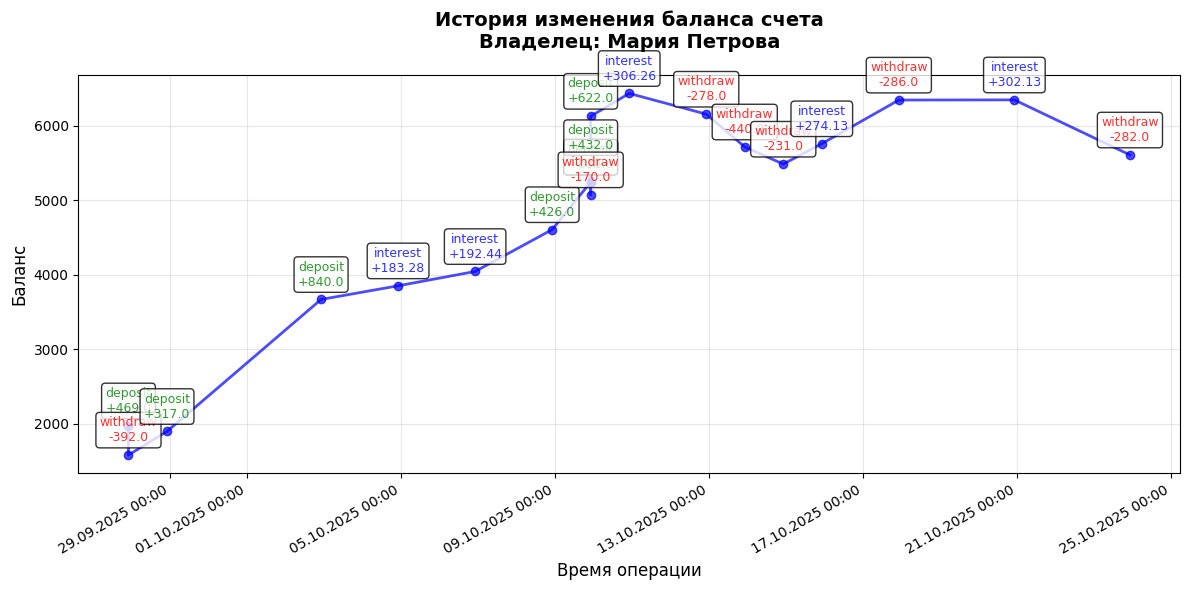

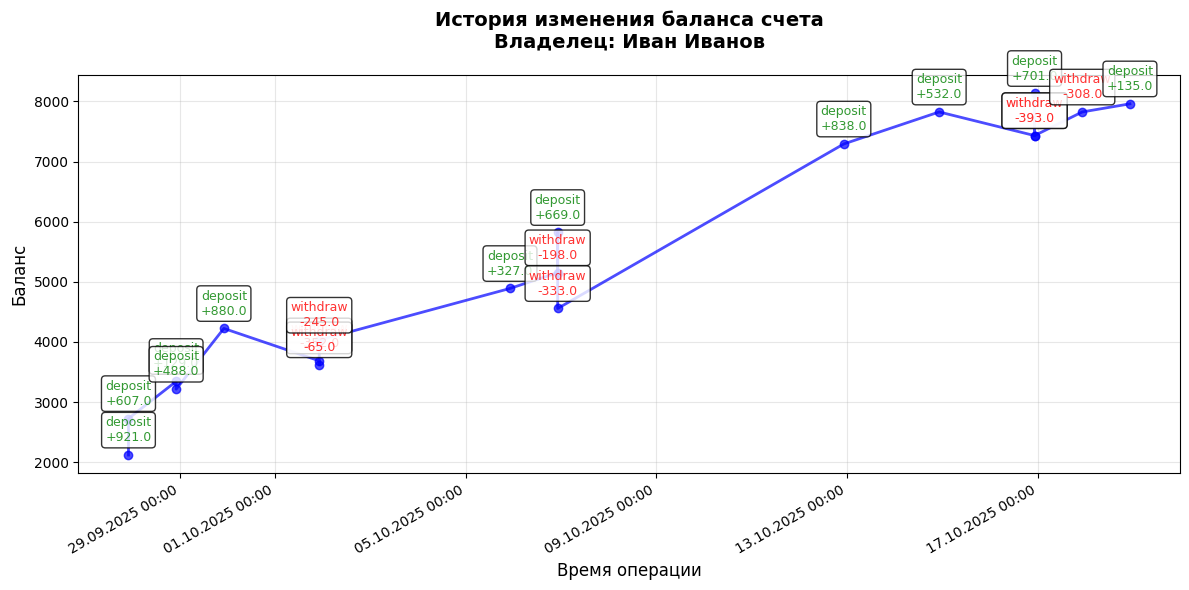

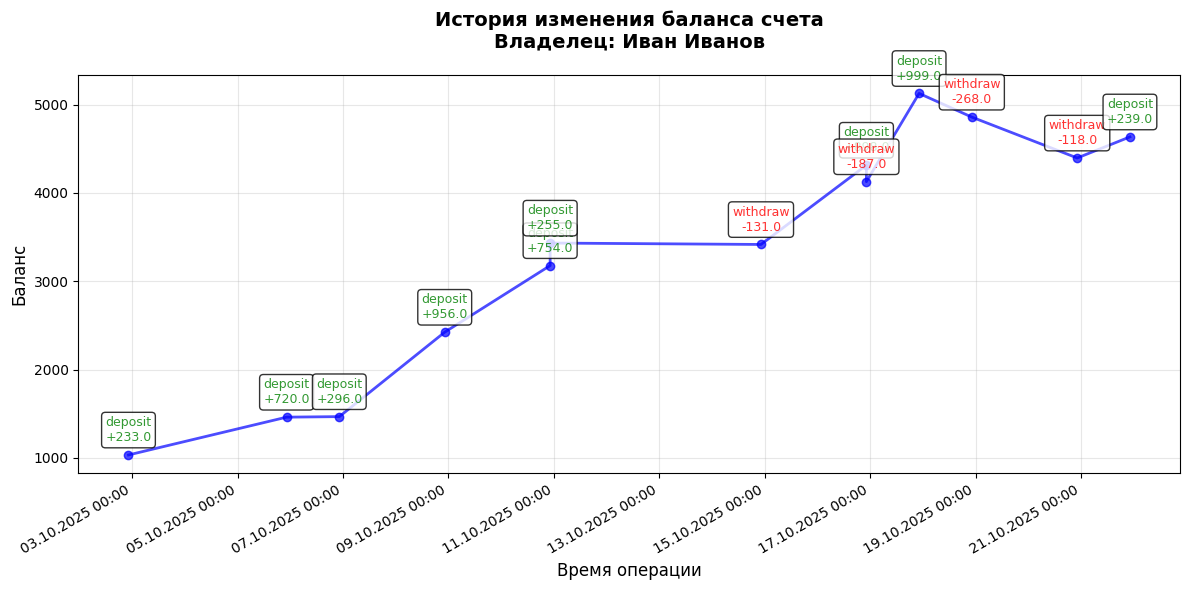

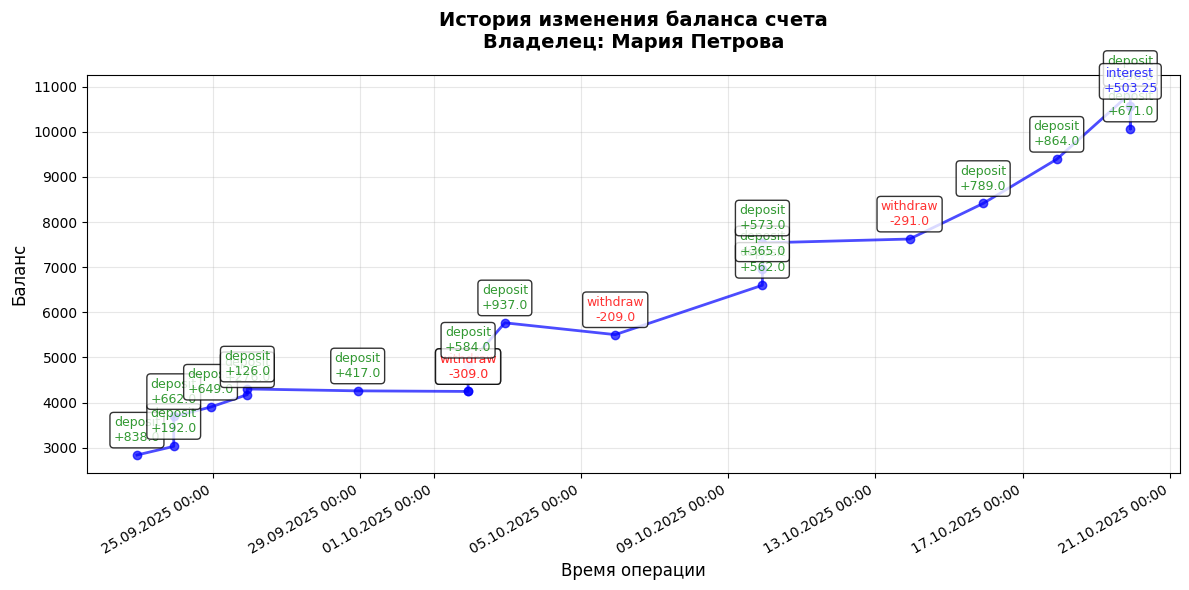

In [10]:
# Ячейка 9: Визуализация загруженных данных
print("\n Визуализация загруженных данных\n")

visualizer = AccountVisualizer()

visualizer.plot_account_history(savings_acc_csv)
print()
visualizer.plot_account_history(checking_acc_csv)
print()
visualizer.plot_account_history(checking_acc_json)
print()
visualizer.plot_account_history(savings_acc_json)